In [ ]:
#IMPORT LIBRARIES
import tensorflow as tf

tf.enable_eager_execution()

from tensorflow import keras as k

import numpy as np
import matplotlib.pyplot as plt


In [37]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

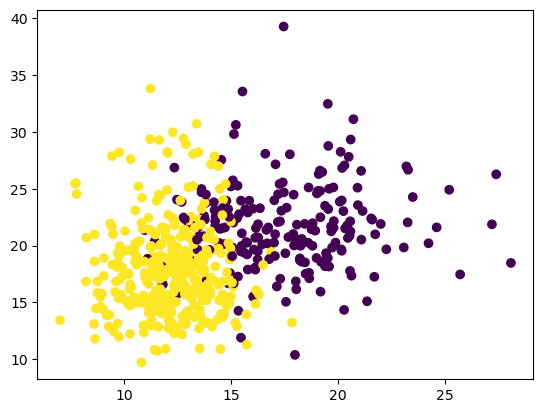

In [38]:
X,y = data['data'], data['target']
X.shape
plt.scatter(X[:,0],X[:,1],c=y)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


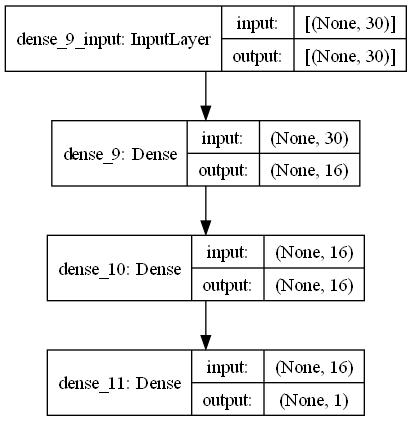

In [39]:

model = k.Sequential([
    k.layers.Dense(16, activation=k.activations.relu, input_shape=[30]),
    k.layers.Dense(16, activation=k.activations.relu),
    k.layers.Dense(1, activation=k.activations.sigmoid)
])

# Sommario del modello
model.summary()

# Plot del modello
k.utils.plot_model(model, show_shapes=True)


In [40]:

model.compile(optimizer=k.optimizers.Adam(),
              loss=k.losses.binary_crossentropy,
              metrics=[k.metrics.binary_accuracy])

# Impostazione degli epoch
epochs = 1500

# Adattamento del modello
model.fit(X, y, epochs=epochs)


Epoch 1/1500
569/569 [==============================] - 0s 418us/sample - loss: 5.7129 - binary_accuracy: 0.6274
Epoch 2/1500
569/569 [==============================] - 0s 39us/sample - loss: 5.7129 - binary_accuracy: 0.6274
Epoch 3/1500
569/569 [==============================] - 0s 41us/sample - loss: 5.7129 - binary_accuracy: 0.6274
Epoch 4/1500
569/569 [==============================] - 0s 49us/sample - loss: 5.7129 - binary_accuracy: 0.6274
Epoch 5/1500
569/569 [==============================] - 0s 39us/sample - loss: 5.7129 - binary_accuracy: 0.6274
Epoch 6/1500
569/569 [==============================] - 0s 49us/sample - loss: 5.7129 - binary_accuracy: 0.6274
Epoch 7/1500
569/569 [==============================] - 0s 49us/sample - loss: 5.7129 - binary_accuracy: 0.6274
Epoch 8/1500
569/569 [==============================] - 0s 51us/sample - loss: 5.7129 - binary_accuracy: 0.6274
Epoch 9/1500
569/569 [==============================] - 0s 52us/sample - loss: 5.7129 - binary_accuracy

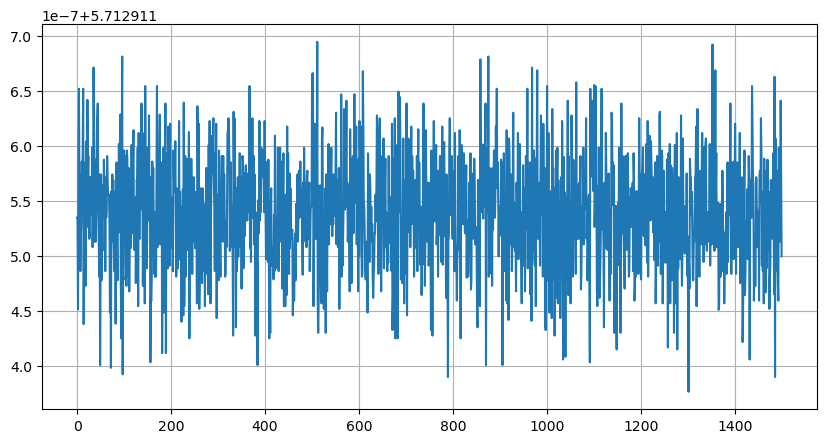

In [41]:
#ANALYSE THE RESULTS
    ##Plot loss
plt.figure(figsize=(10,5))
plt.plot(range(epochs), model.history.history['loss'])
plt.grid(True)

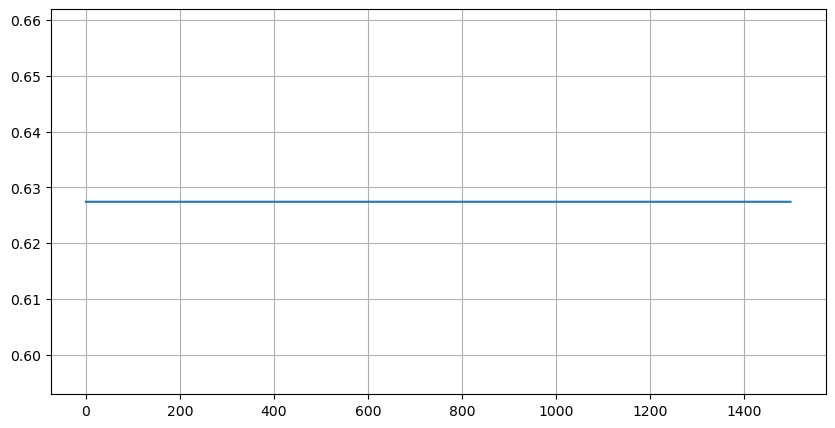

In [42]:
    ##Plot accuracy
plt.figure(figsize=(10,5))
plt.plot(range(epochs), model.history.history['binary_accuracy'])
plt.grid(True)

In [53]:
# Predizione sul set completo
y_pred = model.predict(X)

# Convertire le predizioni in classi binarie (0 o 1)
y_pred_class = np.where(y_pred[:, 0] >= 0.5, 1, 0)

print(y_pred_class)

k.metrics.binary_accuracy(y,y_pred_class)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

<tf.Tensor: id=254095, shape=(), dtype=float32, numpy=0.6274165>